In [ ]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.metrics import r2_score
  from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/Temraturexhumidity.csv")

In [ ]:
df.head()

,Date,AQI,Temprature,Humidity,Car count,Population,Rainfall
0,05/2015,242,34,42,9704741,NaN,11.7
1,06/2015,192,33,57,9704741,25866000.0,58.9
2,07/2015,138,31,75,9704741,25866000.0,268.8
3,08/2015,147,30,76,9704741,25866000.0,247.7
4,09/2015,194,31,61,9704741,25866000.0,26.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        121 non-null    object 
 1   AQI         121 non-null    int64  
 2   Temprature  121 non-null    int64  
 3   Humidity    121 non-null    int64  
 4   Car count   121 non-null    int64  
 5   Population  120 non-null    float64
 6   Rainfall    121 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 6.7+ KB


In [ ]:
df.describe()

,AQI,Temprature,Humidity,Car count,Population,Rainfall
count,121.000000,121.000000,121.000000,1.210000e+02,1.200000e+02,121.000000
mean,216.454545,25.123967,68.289256,8.005661e+06,3.020537e+07,74.575207
std,87.548272,6.939705,12.648740,4.365354e+06,2.591277e+06,110.764123
min,64.000000,11.000000,37.000000,6.579540e+05,2.586600e+07,0.000000
25%,144.000000,19.000000,60.000000,7.739369e+06,2.760200e+07,2.000000
50%,217.000000,27.000000,72.000000,9.704741e+06,3.029100e+07,18.600000
75%,286.000000,31.000000,78.000000,1.139155e+07,3.206600e+07,112.100000
max,377.000000,35.000000,87.000000,1.225335e+07,3.466600e+07,528.600000


In [ ]:
df.columns

Index(['Date', 'AQI ', 'Temprature', 'Humidity', 'Car count', 'Population',
       'Rainfall'],
      dtype='object')

In [ ]:
df.shape

(121, 7)

In [ ]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [ ]:
df.set_index('Date', inplace=True)

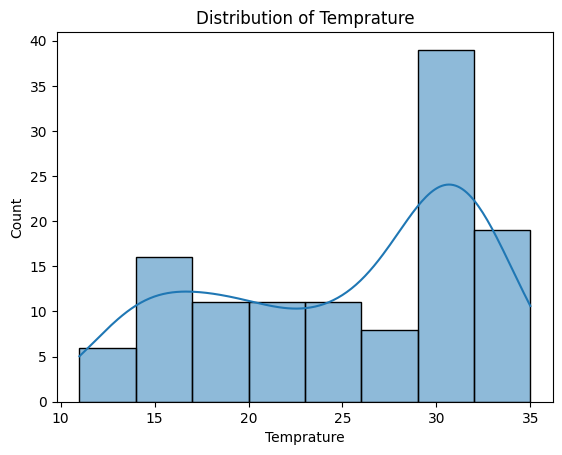

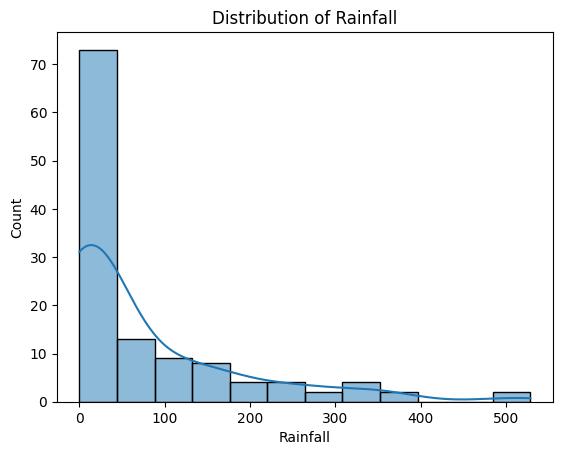

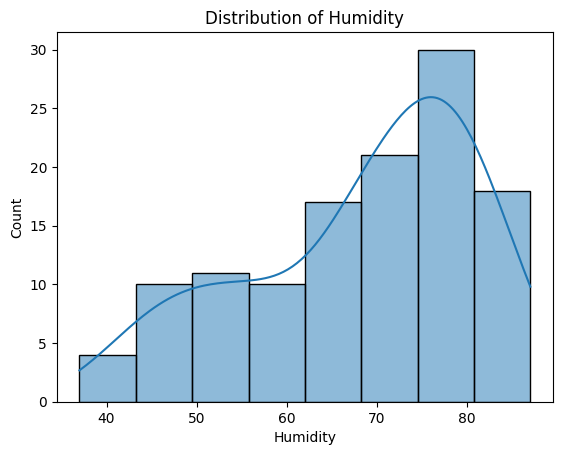

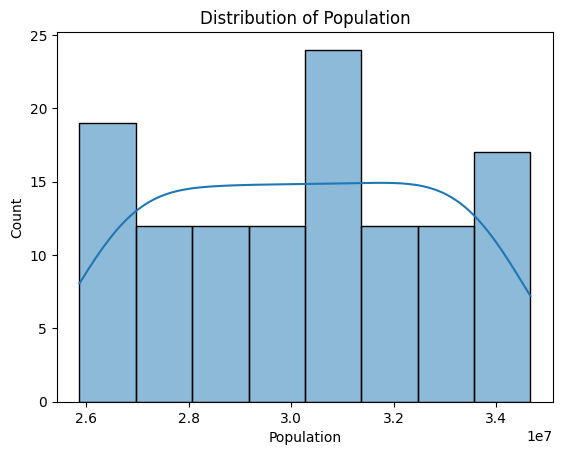

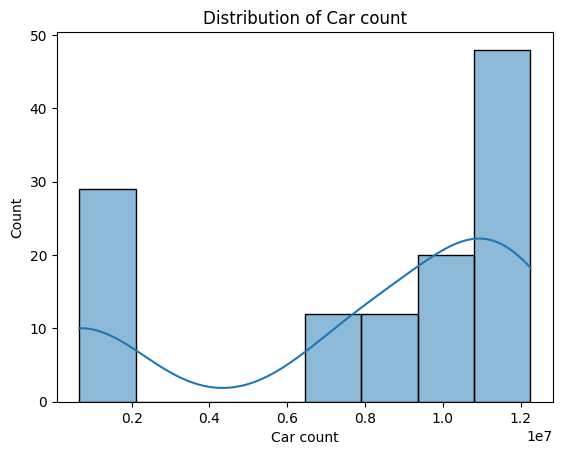

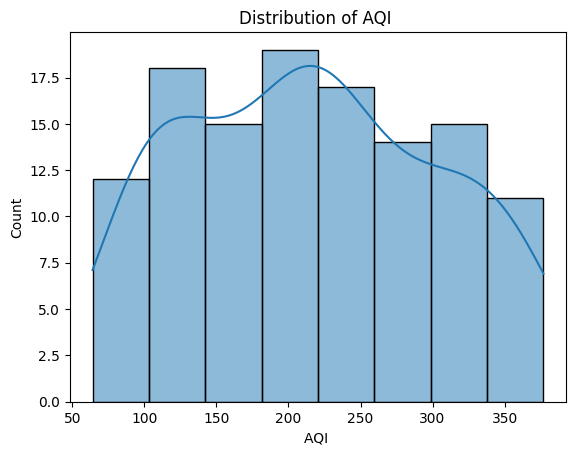

In [ ]:
features = ['Temprature', 'Rainfall', 'Humidity', 'Population', 'Car count', 'AQI ']

for col in features:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

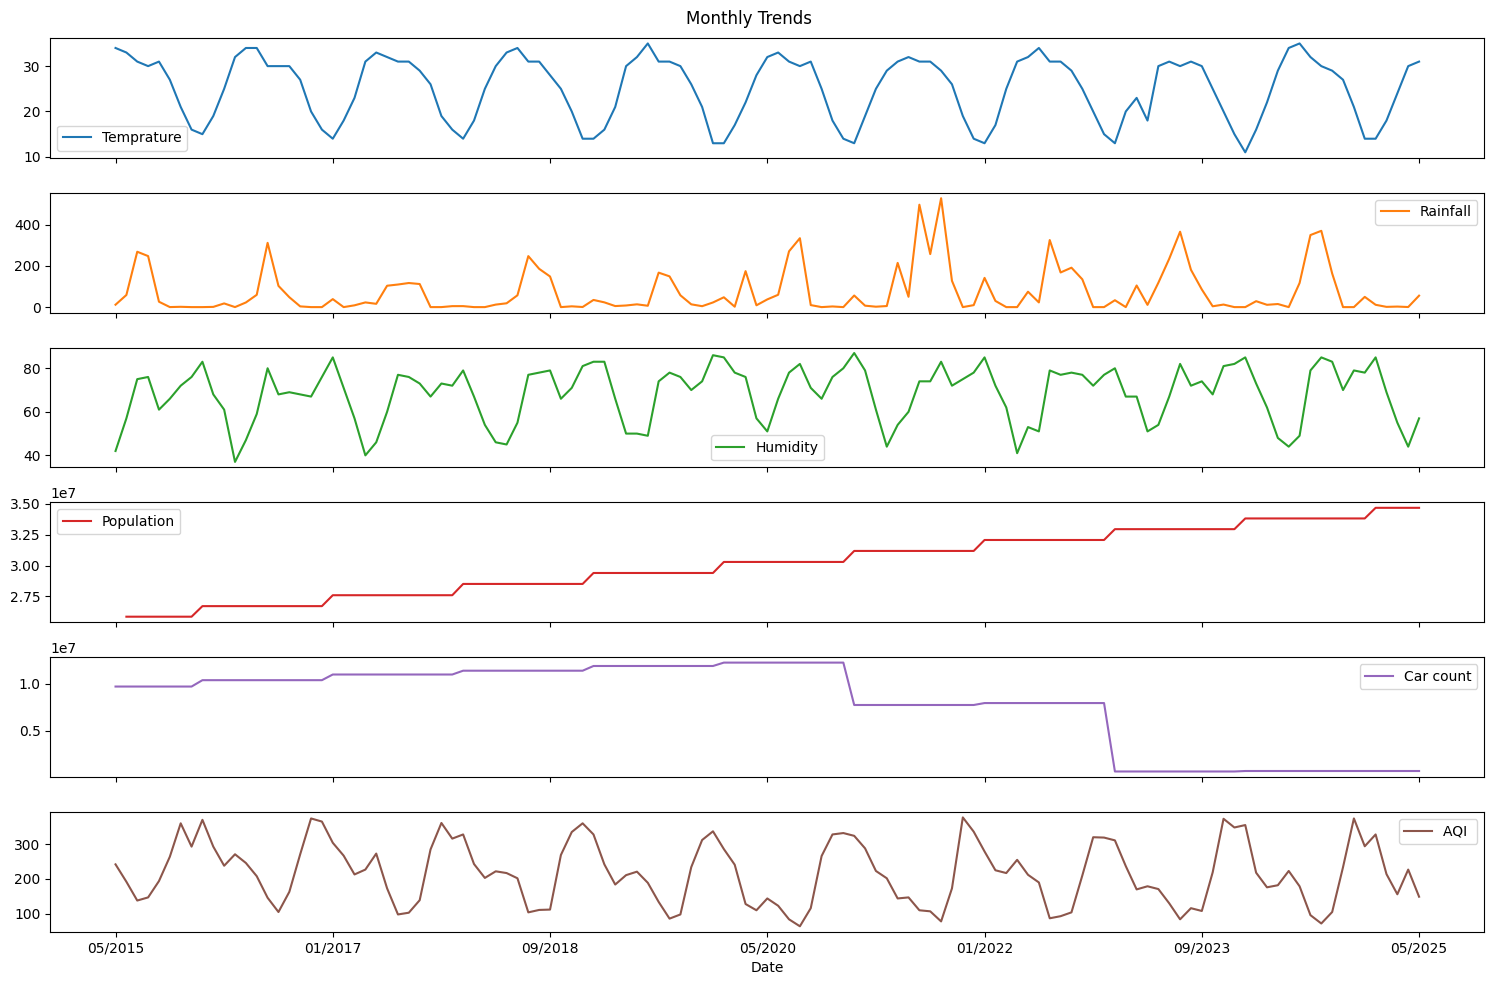

In [ ]:
df[features].plot(subplots=True, figsize=(15, 10), title='Monthly Trends')
plt.tight_layout()
plt.show()

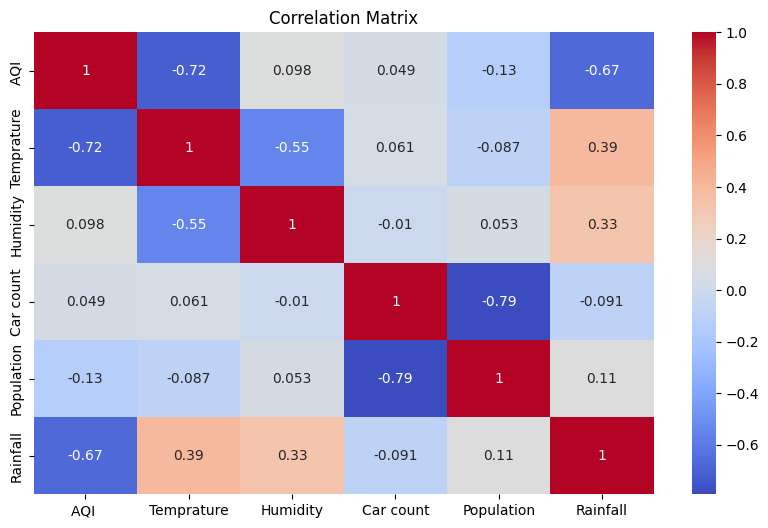

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

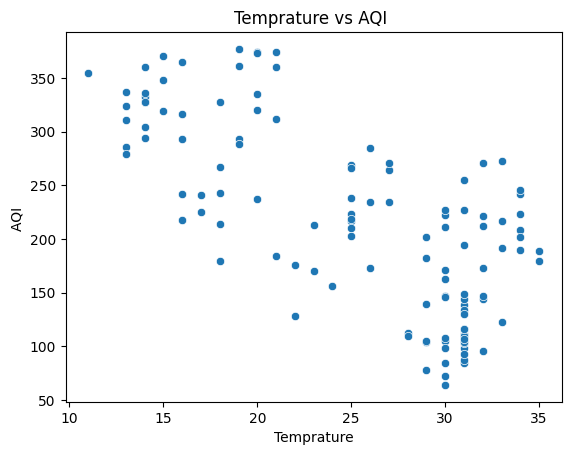

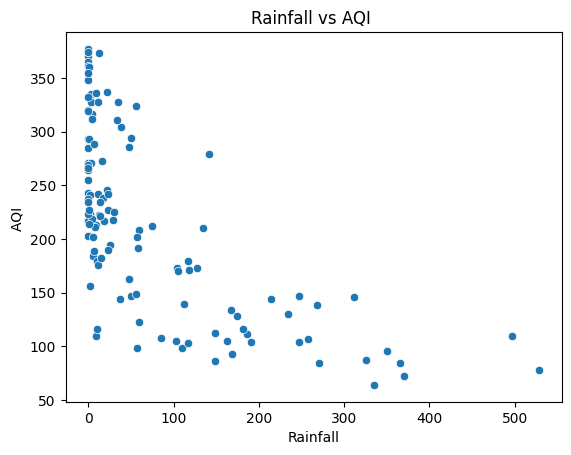

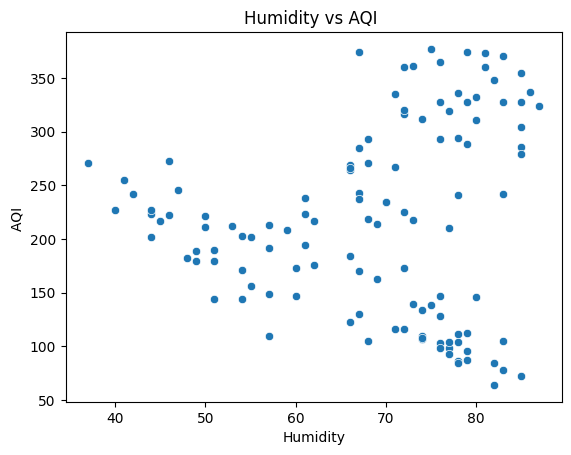

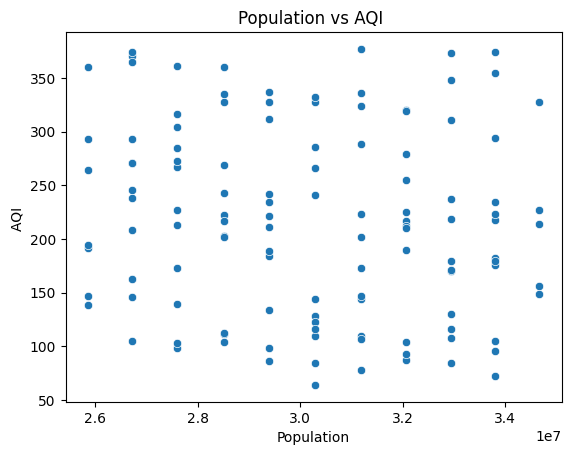

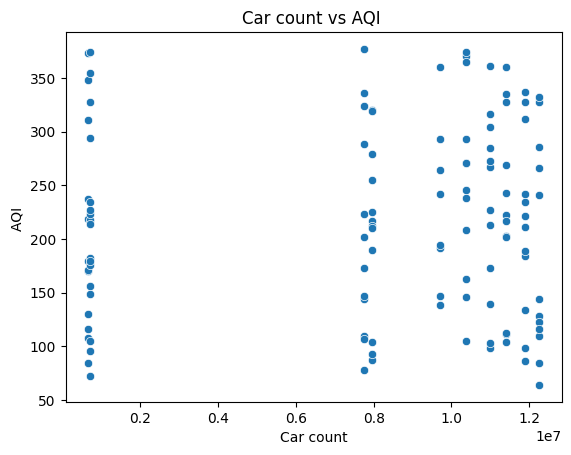

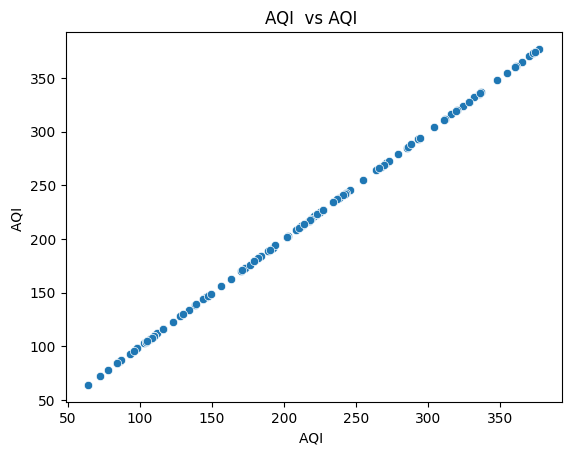

In [ ]:
for col in ['Temprature', 'Rainfall', 'Humidity', 'Population', 'Car count', 'AQI ']:
    sns.scatterplot(data=df, x=col, y='AQI ')
    plt.title(f'{col} vs AQI ')
    plt.show()

In [ ]:
features=['Temprature', 'Rainfall', 'Humidity', 'Population', 'Car count']
label=['AQI ']
X=df[features]
y=df[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:

# Step 4: Predict on test set
y_pred = model.predict(X_test)

# Step 5: Calculate R² score as % accuracy
r2 = r2_score(y_test, y_pred)
accuracy_percent = r2 * 100

print(f"Model Accuracy (R² Score): {accuracy_percent:.2f}%")


Model Accuracy (R² Score): 66.06%


In [ ]:
# Train Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Option 1: Drop rows with any NaN values
df = df.dropna()

In [ ]:
X = df[["Humidity", "Temprature", "Car count", "Population"]]
y = df["AQI "]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lin = lin_model.predict(X_test)

# R² score
r2_lin = r2_score(y_test, y_pred_lin)
accuracy_lin = r2_lin * 100

print(f"Linear Regression Accuracy (R² Score): {accuracy_lin:.2f}%")

Linear Regression Accuracy (R² Score): 62.84%


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Step 1: Create and train the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Step 2: Predict on test set
y_pred_tree = tree_model.predict(X_test)

# Step 3: Calculate accuracy (R² score)
r2_tree = r2_score(y_test, y_pred_tree)
accuracy_tree = r2_tree * 100

print(f"Decision Tree Accuracy (R² Score): {accuracy_tree:.2f}%")

Decision Tree Accuracy (R² Score): 46.96%
